In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io
import scipy.signal

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
np.random.seed(1337)

In [2]:
train_folder = r"D:\test_development\Battery\data2\Panasonic 18650PF Data prepared\Panasonic_NCR18650PF_Data_Normalized\Train\1/"
val_file = r"D:\test_development\Battery\data2\Panasonic 18650PF Data prepared\Panasonic_NCR18650PF_Data_Normalized\Validation\n10degC_LA92_Pan18650PF.mat"
test_file = r"D:\test_development\Battery\data2\Panasonic 18650PF Data prepared\Panasonic_NCR18650PF_Data_Normalized\Test\Test.mat"

In [3]:
x_train = pd.DataFrame()
y_train = pd.DataFrame()
for file in os.listdir(train_folder):
    mat = scipy.io.loadmat(train_folder + file)
    x_train = pd.concat([x_train, pd.DataFrame(mat['X']).T[[2, 3, 4, 5, 6]]], ignore_index=True)
    y_train = pd.concat([y_train, pd.DataFrame(mat['Y']).T], ignore_index=True)
print(x_train.shape)
print(y_train.shape)

(194280, 5)
(194280, 1)


In [4]:
mat = scipy.io.loadmat(val_file)
x_val = pd.DataFrame(mat['X']).T[[2, 3, 4, 5, 6]]
y_val = pd.DataFrame(mat['Y']).T
print(x_val.shape)
print(y_val.shape)

(6856, 5)
(6856, 1)


In [26]:
x_tests = {}
y_tests = {}
mat = scipy.io.loadmat(test_file)
for i in range(len(mat['X_Test'][0])):
    x_tests[mat['X_Test'][0][i][0]] = pd.DataFrame(mat['X_Test'][1][i]).T[[2, 3, 4, 5, 6]]
    y_tests[mat['Y_Test'][0][i][0]] = pd.DataFrame(mat['Y_Test'][1][i]).T

(22148, 5)
(22148, 1)


In [28]:
x_test = pd.concat([df for df in x_tests.values()], ignore_index=True)
y_test = pd.concat([df for df in y_tests.values()], ignore_index=True)

print(x_test.shape)
print(y_test.shape)

(159911, 5)
(159911, 1)


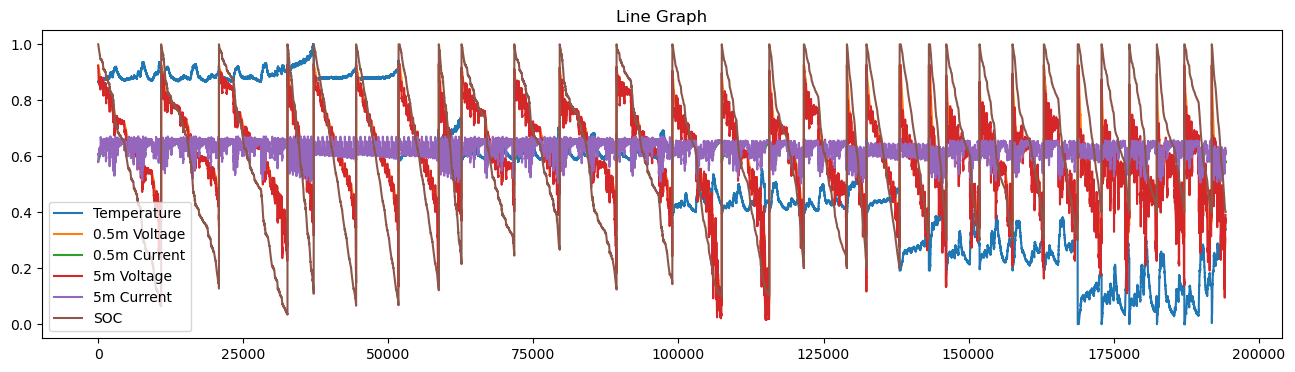

In [9]:
def train_test_plot(x, y):
    df = pd.concat([x, y], axis=1)
    df.iloc[:,0].plot(figsize=(16, 4), legend=True)
    df.iloc[:,1].plot(figsize=(16, 4), legend=True)
    df.iloc[:,2].plot(figsize=(16, 4), legend=True)
    df.iloc[:,3].plot(figsize=(16, 4), legend=True)
    df.iloc[:,4].plot(figsize=(16, 4), legend=True)
    df.iloc[:,5].plot(figsize=(16, 4), legend=True)
    plt.legend(['Temperature', '0.5m Voltage', '0.5m Current', '5m Voltage', '5m Current', 'SOC'])
    plt.title("Line Graph")
    plt.show()

train_test_plot(x_train, y_train)

In [74]:
def clipped_relu(x):
    return tf.keras.activations.relu(x, max_value=1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(21, activation='relu'),
  tf.keras.layers.Dense(19, activation='relu'),
  tf.keras.layers.Dense(1, activation=clipped_relu)
])

model.compile(optimizer='adam',
              loss='mean_squared_error')

history = model.fit(
  x_train.values,
  y_train.values,
  epochs=10,
  validation_data=(x_val, y_val),
  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)]
)

Train on 194280 samples, validate on 22148 samples
Epoch 1/10
194280/194280 [==============================] - 7s 36us/sample - loss: 0.0018 - val_loss: 1.1712e-04
Epoch 2/10
194280/194280 [==============================] - 7s 34us/sample - loss: 4.5554e-04 - val_loss: 2.1039e-04


3600/3600 [==============================] - 0s 23us/sample - loss: 8.4756e-05


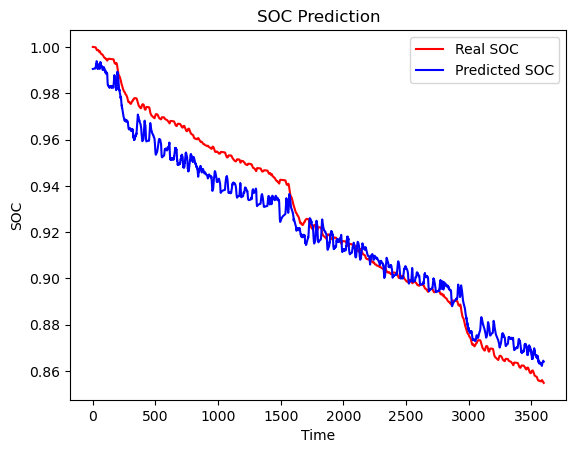

In [57]:
def test_eva(x, y):
    model.evaluate(x, y)
    prediction = model.predict(x)

    # Visualising the results
    plt.plot(y, color = 'red', label = 'Real SOC')
    plt.plot(prediction, color = 'blue', label = 'Predicted SOC')
    plt.title('SOC Prediction')
    plt.xlabel('Time')
    plt.ylabel('SOC')
    plt.legend()
    plt.show()

test_eva(x_test.head(3600), y_test.head(3600))

In [102]:
mat = scipy.io.loadmat(r"D:\test_development\Battery\data1\LG_HG2_Prepared_Dataset_McMasterUniversity_Jan_2020\LGHG2@n10C_to_25degC\Train\TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.mat")
x_other = pd.DataFrame(mat['X']).T
y_other = pd.DataFrame(mat['Y']).T

(669956, 5)
(669956, 1)


669956/669956 [==============================] - 10s 14us/sample - loss: 0.2279


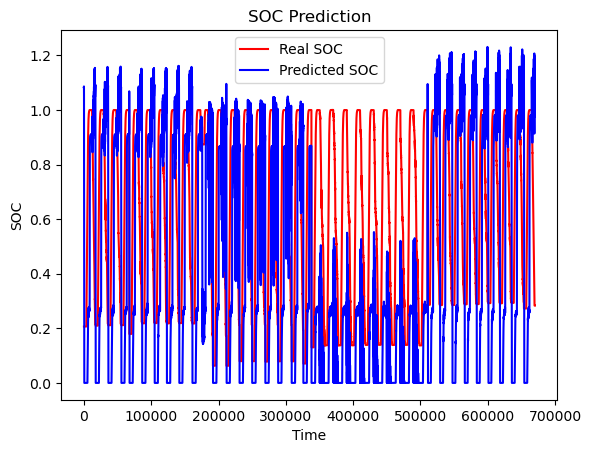

In [105]:
test_eva(x_other, y_other)